##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES**
--------------------------------------------------------------------------------

***Team number: 13***

---
***Full names of all students in the team: ANIRUDH BAGALKOTKER, KARTIK PANDEY, ADWAIT KULKARNI, JOY SINHA***

---
***Id number of all students in the team: 2021A7PS2682H, 2021A7PS2574H, 2021A7PS2995H, 2021A8PS1606H***



This assignment aims to identify the differences between three Machine Learning models.

# ***1. Preprocess and perform exploratory data analysis of the dataset obtained***

### **Import Dependencies and Load Dataset**

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [249]:
# Load the dataset

# Add column names
column_names = [
    "state", "county", "community", "communityname", "fold", "population", "householdsize",
    "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21",
    "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome",
    "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire",
    "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade",
    "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu",
    "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8",
    "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup",
    "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup",
    "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt",
    "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart",
    "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc",
    "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet",
    "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85",
    "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps",
    "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic",
    "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack",
    "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits",
    "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans",
    "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy",
    "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"
]

# Define missing values
missing_values = ['?']

# Read the dataset
data = pd.read_csv('communities.data', header=None, names=column_names, na_values=missing_values)

data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [250]:
# Remove non-predictive columns
df = data.drop(["state", "county", "community", "communityname", "fold"], axis=1)
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


### **Exploratory Data Analysis**

In [251]:
samples, features = np.shape(df)
df.shape

(1994, 123)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(123)
memory usage: 1.9 MB


In [253]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [254]:
df['ViolentCrimesPerPop'].value_counts(normalize=True)

ViolentCrimesPerPop
0.03    0.052156
0.04    0.046138
0.06    0.043129
0.05    0.040120
0.02    0.037111
          ...   
0.79    0.001003
0.77    0.000502
0.89    0.000502
0.94    0.000502
0.96    0.000502
Name: proportion, Length: 98, dtype: float64

In [255]:
df.drop('ViolentCrimesPerPop', axis=1).skew()

population             5.063957
householdsize          0.981300
racepctblack           1.863340
racePctWhite          -1.300489
racePctAsian           2.604395
                         ...   
PolicOperBudg          4.153317
LemasPctPolicOnPatr   -1.589877
LemasGangUnitDeploy    0.221361
LemasPctOfficDrugUn    2.554246
PolicBudgPerPop        3.222583
Length: 122, dtype: float64

In [256]:
df.corr()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.796090,0.778311,-0.080482,0.100012,0.466352,-0.046494,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.091354,-0.021212,-0.017972,-0.000784,-0.094368,-0.152603,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.248632,0.169492,-0.168434,0.022388,0.260793,0.045311,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.258277,-0.271687,0.125223,-0.078552,-0.276234,-0.014957,-0.684770
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,-0.038363,0.144448,0.069061,0.139501,0.101888,-0.024774,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.080482,-0.017972,-0.168434,0.125223,0.069061,0.054310,0.002067,0.040644,0.043506,0.016439,...,-0.088810,0.111841,0.045513,-0.115349,-0.089736,1.000000,0.007179,0.047851,-0.237240,-0.082317
LemasGangUnitDeploy,0.100012,-0.000784,0.022388,-0.078552,0.139501,0.057854,0.035715,0.015689,-0.003182,-0.125497,...,0.144122,-0.153781,-0.160937,0.078436,0.023349,0.007179,1.000000,-0.035543,-0.021100,0.116163
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,-0.118595,-0.141782,0.047851,-0.035543,1.000000,0.042185,0.348627
PolicBudgPerPop,-0.046494,-0.152603,0.045311,-0.014957,-0.024774,0.004980,-0.242682,-0.209134,-0.158539,0.224796,...,-0.148499,0.134848,0.155266,0.245532,0.259342,-0.237240,-0.021100,0.042185,1.000000,0.095961


In [257]:
fig = go.Figure(go.Heatmap(z=df.corr(), x=df.corr().columns.tolist(), y=df.corr().columns.tolist(), colorscale='Viridis'))
fig.show()

### **Data Preprocessing**

In [258]:
# Check if there are any missing values
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > (samples // 2)].index

# Print the number of missing values for each column
for column in columns_with_missing_values:
    print(f"{column}: {missing_values[column]} missing values")
    
# Drop columns with too many missing values
df = df.drop(columns=columns_with_missing_values)

LemasSwornFT: 1675 missing values
LemasSwFTPerPop: 1675 missing values
LemasSwFTFieldOps: 1675 missing values
LemasSwFTFieldPerPop: 1675 missing values
LemasTotalReq: 1675 missing values
LemasTotReqPerPop: 1675 missing values
PolicReqPerOffic: 1675 missing values
PolicPerPop: 1675 missing values
RacialMatchCommPol: 1675 missing values
PctPolicWhite: 1675 missing values
PctPolicBlack: 1675 missing values
PctPolicHisp: 1675 missing values
PctPolicAsian: 1675 missing values
PctPolicMinor: 1675 missing values
OfficAssgnDrugUnits: 1675 missing values
NumKindsDrugsSeiz: 1675 missing values
PolicAveOTWorked: 1675 missing values
PolicCars: 1675 missing values
PolicOperBudg: 1675 missing values
LemasPctPolicOnPatr: 1675 missing values
LemasGangUnitDeploy: 1675 missing values
PolicBudgPerPop: 1675 missing values


In [259]:
# Handle missing values (if any) by replacing them with the mean
df.fillna(df.mean(), inplace=True)
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [260]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [261]:
# Performing PCA on the dataset
target_variable = df['ViolentCrimesPerPop']
features = df.drop(['ViolentCrimesPerPop'], axis=1)

# Standardize the features
standardized_features = (features - features.mean()) / features.std()

# Calculate the covariance matrix
cov_matrix = np.cov(standardized_features, rowvar=False)

# Calculate the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

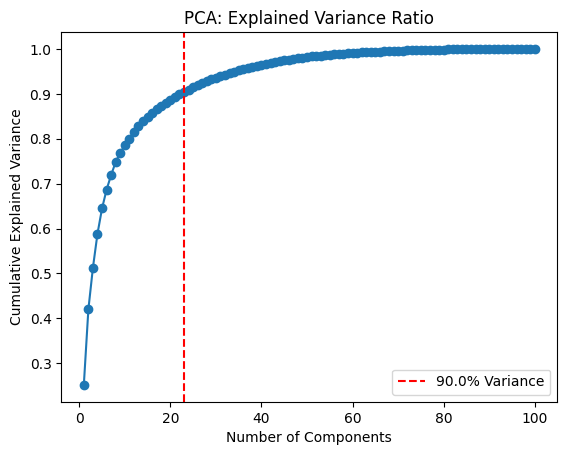

In [262]:
# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 90% of the variance
desired_explained_variance = 0.90
num_components = np.argmax(cumulative_explained_variance >= desired_explained_variance) + 1

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{desired_explained_variance * 100}% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance Ratio')
plt.legend()
plt.show()

In [318]:
# Project the original data onto the selected number of components
selected_eigenvectors = eigenvectors[:, :num_components]
pca_result = np.dot(standardized_features, selected_eigenvectors)

# Create a DataFrame with the principal components and the target variable
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i + 1}' for i in range(num_components)])
df_pca['ViolentCrimesPerPop'] = target_variable
df_pca.head()
df_pca.to_csv('crimes.csv', index=False)

### **Generate Random Test and Train Splits**

In [264]:
seed = 420
train_fraction = 0.8
train = df_pca.sample(frac=train_fraction, random_state=seed)
test = df_pca.drop(train.index)

In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1595 entries, 493 to 1405
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PC1                  1595 non-null   float64
 1   PC2                  1595 non-null   float64
 2   PC3                  1595 non-null   float64
 3   PC4                  1595 non-null   float64
 4   PC5                  1595 non-null   float64
 5   PC6                  1595 non-null   float64
 6   PC7                  1595 non-null   float64
 7   PC8                  1595 non-null   float64
 8   PC9                  1595 non-null   float64
 9   PC10                 1595 non-null   float64
 10  PC11                 1595 non-null   float64
 11  PC12                 1595 non-null   float64
 12  PC13                 1595 non-null   float64
 13  PC14                 1595 non-null   float64
 14  PC15                 1595 non-null   float64
 15  PC16                 1595 non-null   floa

In [266]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 2 to 1989
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PC1                  399 non-null    float64
 1   PC2                  399 non-null    float64
 2   PC3                  399 non-null    float64
 3   PC4                  399 non-null    float64
 4   PC5                  399 non-null    float64
 5   PC6                  399 non-null    float64
 6   PC7                  399 non-null    float64
 7   PC8                  399 non-null    float64
 8   PC9                  399 non-null    float64
 9   PC10                 399 non-null    float64
 10  PC11                 399 non-null    float64
 11  PC12                 399 non-null    float64
 12  PC13                 399 non-null    float64
 13  PC14                 399 non-null    float64
 14  PC15                 399 non-null    float64
 15  PC16                 399 non-null    float64

In [267]:
# Assuming 'Potability' is the column you want to predict
X_train = train.drop('ViolentCrimesPerPop', axis=1)  # Features for training
y_train = train['ViolentCrimesPerPop']  # Target for training

X_test = test.drop('ViolentCrimesPerPop', axis=1)  # Features for testing
y_test = test['ViolentCrimesPerPop']  # Target for testing

# Convert labels to numpy array for applying ML Models
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [268]:
# Compute Accuracy of the model
accuracies = []

def accuracy(pred, y_test, record, threshold=0.5):
    # Calculate the standard deviation of the true values
    y_std = np.std(y_test)

    # Check if the absolute difference is below the threshold (multiple of standard deviation)
    correct_predictions = np.abs(pred - y_test) < threshold * y_std

    # Calculate accuracy as the percentage of correct predictions
    accu = 100 * correct_predictions.mean()

    if record:
        accuracies.append(accu)

    return accu

# ***2. Decision tree model with entropy implementation***

## **_2.1 Implementation of the Model_**

In [276]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "entropy")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=""):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(f"{indent}Leaf Node: Class {tree.value}")

        else:
            print(f"{indent}Node: PC{tree.feature_index} <= {tree.threshold} [Info Gain: {tree.info_gain}]")
            print(f"{indent}left:")
            self.print_tree(tree.left, indent + "  ")
            print(f"{indent}right:")
            self.print_tree(tree.right, indent + "  ")
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
                
        preditions = [self.make_prediction(x, self.root) for x in X.values]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if (tree.value != None):
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

classifier = DecisionTreeClassifier(min_samples_split=2, max_depth=num_components)

In [277]:
classifier.fit(X_train,pd.DataFrame(y_train))

In [279]:
Y_pred = np.array(classifier.predict(X_test))
acc = accuracy(y_test, Y_pred, record=False)
acc

57.89473684210527

## **_2.2 Insights drawn (plots, markdown explanations)_**

#### **Decision Tree Structure**
Lets take a look at the decision tree structure.

In [ ]:
classifier.print_tree()

# ***3. Adaboost***

## **_3.1 Implementation of the Model_**

In [363]:
# Decision stump used as weak classifier
class DecisionStump():
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions


class Adaboost():

    def __init__(self, n_clf=2):
        self.n_clf = n_clf

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []
        # Iterate through classifiers
        for _ in range(self.n_clf):
            clf = DecisionStump()

            min_error = float('inf')
            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred
    
classifier = Adaboost()

In [364]:
classifier.fit(X_train.values, y_train)

y_pred = classifier.predict(X_test.values)

In [367]:
acc = accuracy(y_test, y_pred, record=False, threshold=1)
acc

56.390977443609025

## **_3.2 Insights drawn (plots, markdown explanations)_**

# **_4. Multiclass SVM_**

## **_4.1 Implementation of the Model_**

## **_4.2 Insights drawn (plots, markdown explanations)_**

# **_5. References_**

1.   List item
2.   List item

